In [21]:
filename = '../data/屏幕快照 2017-09-25 下午3.56.54.png'

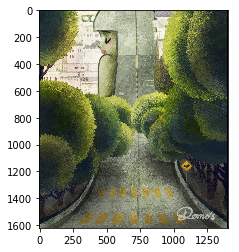

In [28]:
%matplotlib inline
from PIL import Image 
import matplotlib.pyplot as plt

image = Image.open(filename)
plt.imshow(image)

In [29]:
a=0.5
0< a < 1

True

In [30]:
import colorsys  
   
def get_dominant_color(image, beside_color, step):  
      
#颜色模式转换，以便输出rgb颜色值  
    image = image.convert('RGBA')  
      
#生成缩略图，减少计算量，减小cpu压力  
    image.thumbnail((200, 200))  
      
    max_score = 0 #原来的代码此处为None  
    dominant_color = 0 #原来的代码此处为None，但运行出错，改为0以后 运行成功，原因在于在下面的 <span style="font-family:Arial, Helvetica, sans-serif;">score > max_score的比较中，max_score的初始格式不定</span>  
    proportion = 0
        
    for count, (r, g, b, a) in image.getcolors(image.size[0] * image.size[1]):  
        # 跳过纯黑色  
        if a == 0:  
            continue
            
        if ((r>180)&(g>180)&(b>180)):  
            continue
            
        if ((r<80)&(g<80)&(b<80)):  
            continue 
            
        if ((beside_color[0]-step<r<beside_color[0]+step)&(beside_color[1]-step<g<beside_color[1]+step)&(beside_color[2]-step<b<beside_color[2]+step)):  
            continue
            
          
        saturation = colorsys.rgb_to_hsv(r / 255.0, g / 255.0, b / 255.0)[1]  
         
        y = min(abs(r * 2104 + g * 4130 + b * 802 + 4096 + 131072) >> 13, 235)  
         
        y = (y - 16.0) / (235 - 16)  
          
        # 忽略高亮色  
        if y > 0.9:  
            continue  
          
        # Calculate the score, preferring highly saturated colors.  
        # Add 0.1 to the saturation so we don't completely ignore grayscale  
        # colors by multiplying the count by zero, but still give them a low  
        # weight.  
        score = (saturation + 0.1) * count  
          
        if score > max_score:  
            max_score = score  
            dominant_color = (r, g, b)  
            proportion = count
      
    return dominant_color, proportion  

In [31]:
proportion = [1]*2
main_color = [1]*2

(126, 107, 51) 5
(120, 124, 108) 14


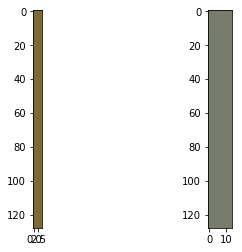

In [33]:
from matplotlib.gridspec import GridSpec

main_color[0], proportion[0] = get_dominant_color(image,(0,0,0),50)
print(main_color[0], proportion[0])

main_color[1], proportion[1] = get_dominant_color(image,main_color[0],50)
print(main_color[1],proportion[1])




the_grid = GridSpec(1, 2)

plt.subplot(the_grid[0, 0], aspect=1)

im= Image.new("RGB", (proportion[0], 128),main_color[0])
plt.imshow(im)

plt.subplot(the_grid[0, 1], aspect=1)

im= Image.new("RGB", (proportion[1], 128),main_color[1])
plt.imshow(im)



In [17]:
import colorgram

color_num = 16

# Extract 6 colors from an image.
colors = colorgram.extract(filename, color_num)

# colorgram.extract returns Color objects, which let you access
# RGB, HSL, and what proportion of the image was that color.
first_color = colors[0]
rgb = first_color.rgb # e.g. (255, 151, 210)
hsl = first_color.hsl # e.g. (230, 255, 203)
proportion  = first_color.proportion # e.g. 0.34

# RGB and HSL are named tuples, so values can be accessed as properties.
# These all work just as well:
red = rgb[0]
red = rgb.r
saturation = hsl[1]
saturation = hsl.s

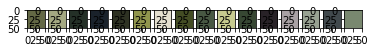

In [18]:
the_grid = GridSpec(1, color_num)

for i in range(color_num):

    plt.subplot(the_grid[0, i], aspect=1)

    im= Image.new("RGB", (50, 50),colors[i].rgb)
    plt.imshow(im)

